In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [97]:
X,Y = load_diabetes(return_X_y=True)

In [99]:
X_df = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
Y_df = pd.DataFrame(Y, columns=['target'])

In [101]:
df = pd.concat((X_df, Y_df), axis=1)

In [103]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [105]:
X = df.iloc[:,0:10].values
Y = df.iloc[:,-1].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

# Step # 1
## Mean of output column

In [111]:
df['pred1'] = df['target'].mean()
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,pred1
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,152.133484
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,152.133484
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,152.133484
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,152.133484
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,152.133484


# Step # 2
## Calculating error of first model  (pseudo residual)

In [114]:
df['res1'] = df['target'] - df['pred1']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,pred1,res1
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,152.133484,-1.133484
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,152.133484,-77.133484
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,152.133484,-11.133484
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,152.133484,53.866516
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,152.133484,-17.133484


# Step # 3
## Predicting errors of my first model

In [117]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [127]:
tree1.fit(X, df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

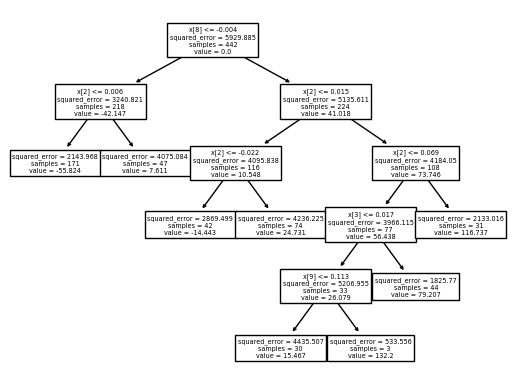

In [136]:
plot_tree(tree1)
plt.show()

In [141]:
y_pred = 152.133484	+ tree1.predict(X_test)

In [157]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [165]:
df['pred2'] = 152.133484 + tree1.predict(X)

In [167]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,pred1,res1,pred2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,152.133484,-1.133484,231.340909
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,152.133484,-77.133484,96.309941
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,152.133484,-11.133484,167.600000
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,152.133484,53.866516,176.864865
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,152.133484,-17.133484,96.309941


In [169]:
df['res2'] = df['target'] - df['pred2']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,pred1,res1,pred2,res2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,152.133484,-1.133484,231.340909,-80.340909
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,152.133484,-77.133484,96.309941,-21.309941
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,152.133484,-11.133484,167.600000,-26.600000
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,152.133484,53.866516,176.864865,29.135135
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,152.133484,-17.133484,96.309941,38.690059


In [171]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [173]:
tree2.fit(X, df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [175]:
y_pred = 152.133484 + sum(regressor.predict(X_test) for regressor in [tree1,tree2])

In [215]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    y_pred = sum(lr * regressor.predict(X) for regressor in regs)

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


In [217]:
gradient_boost(X,Y,5,lr=0.1)